In [1]:
from aux_functions.helpers import *
from PIL import Image, ImageFont, ImageDraw
import os
import matplotlib.pyplot as plt

In [2]:
FONT_PATH = '../data/fonts/'

In [3]:
#Examples with Pre-processing Problems
pushed_top = '../data/B/RoseDiFont.png'
too_small =  '../data/B/MagicPens.png'
pushed_right = '../data/B/Dhanikans Signature Italic_dafont.png'
pushed_bottom = '../data/C/Indesign Signature - PERSONAL USE.png'
blank = '../data/C/MTF Hooty Coo.png'
too_big = '../data/D/Hanabi.png'
png_paths = [pushed_top, too_small, pushed_right, pushed_bottom, blank,\
            too_big]

In [4]:
ttf_paths = []
for i in png_paths:
    font_name = i.split('/')[-1].split('.')[0]
    path = f'{FONT_PATH}{font_name}.ttf'
    ttf_paths.append(path)

In [5]:
ttf_paths.append('../data/fonts/DJB SLOPPYJO.ttf')

/home/mathlizard/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


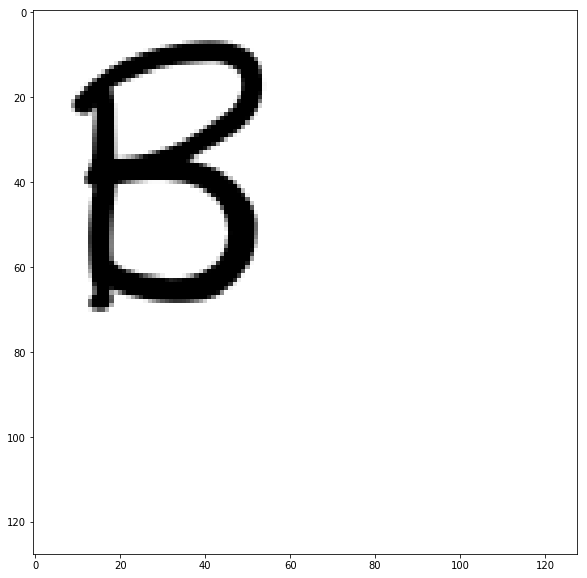

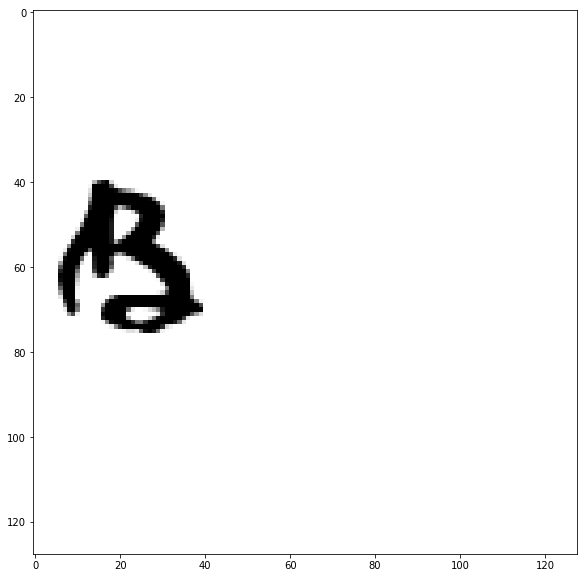

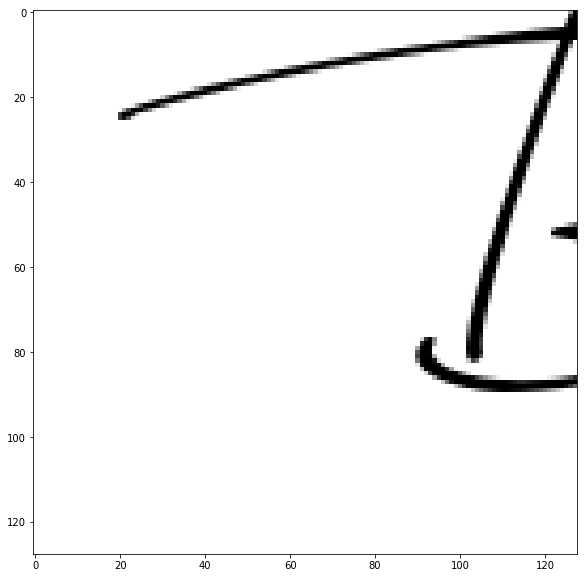

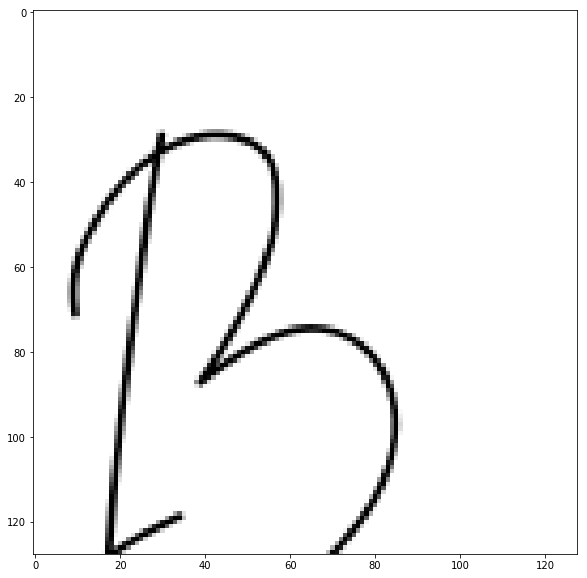

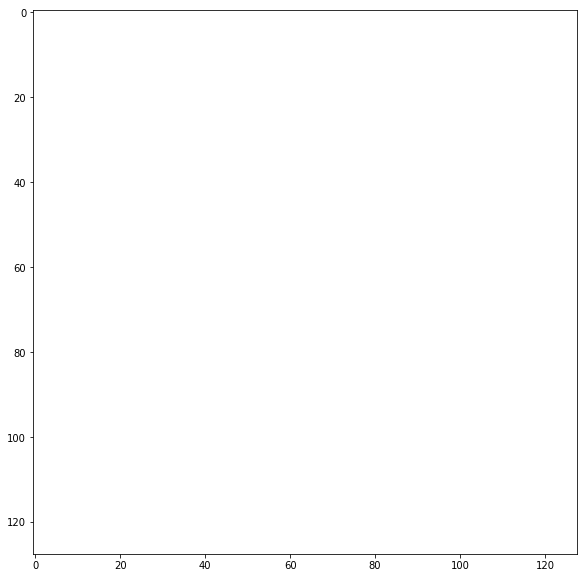

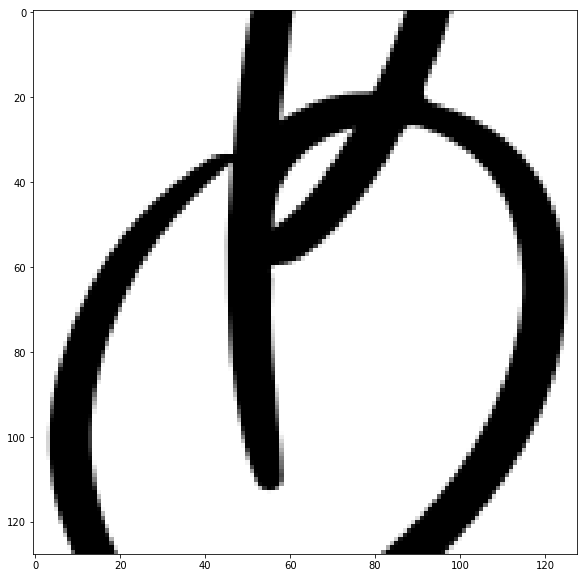

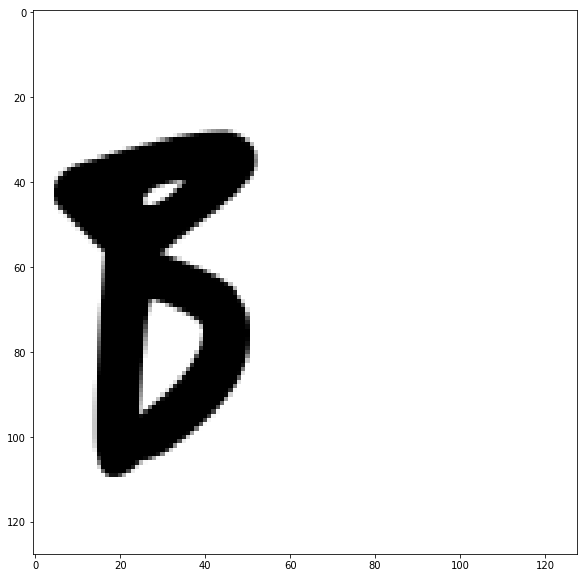

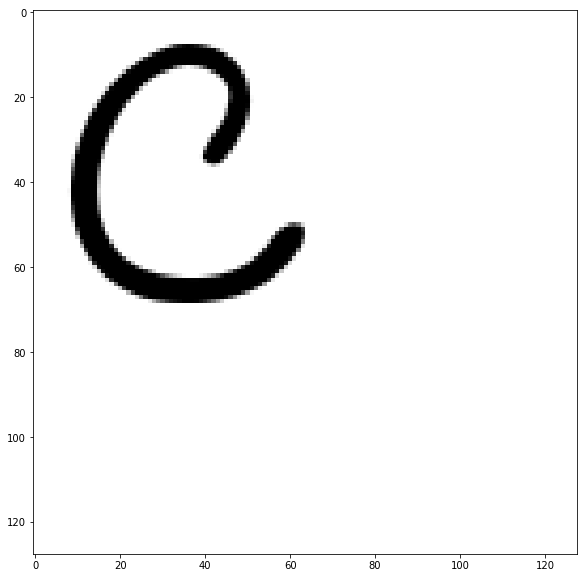

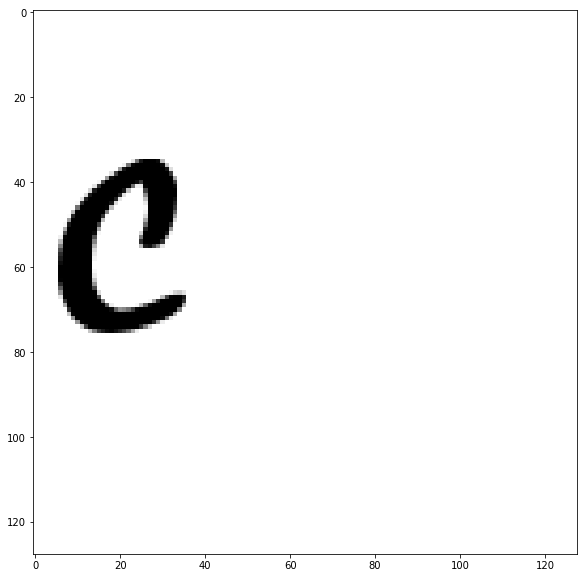

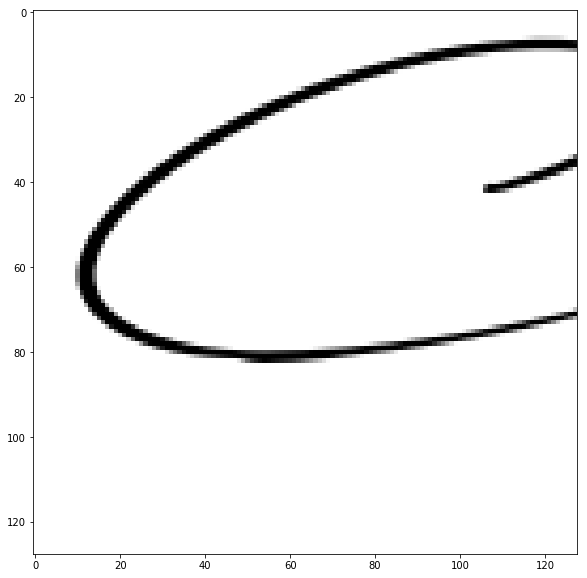

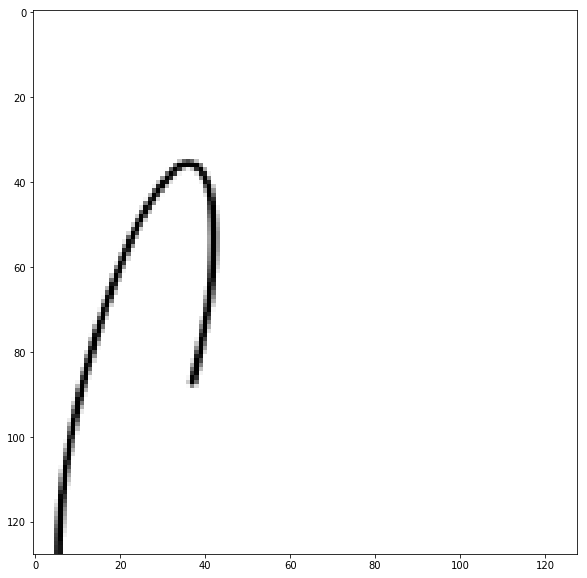

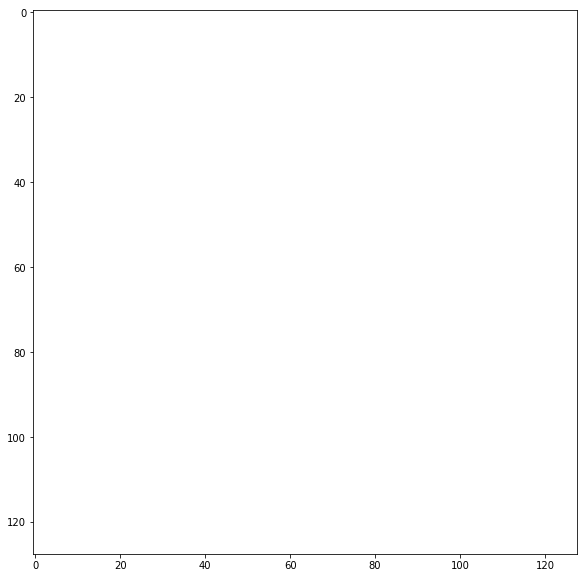

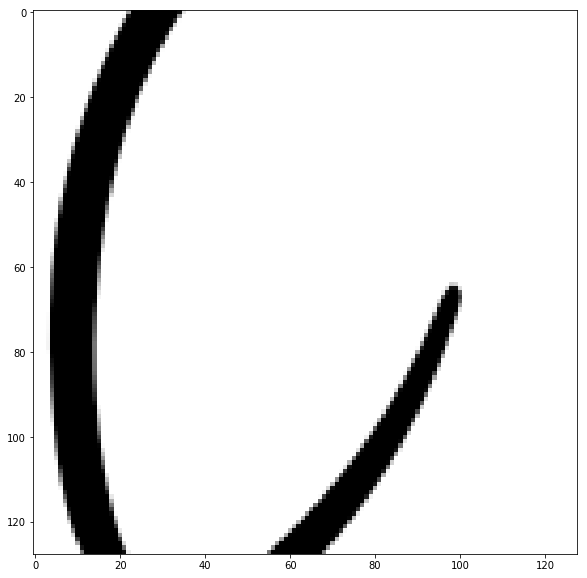

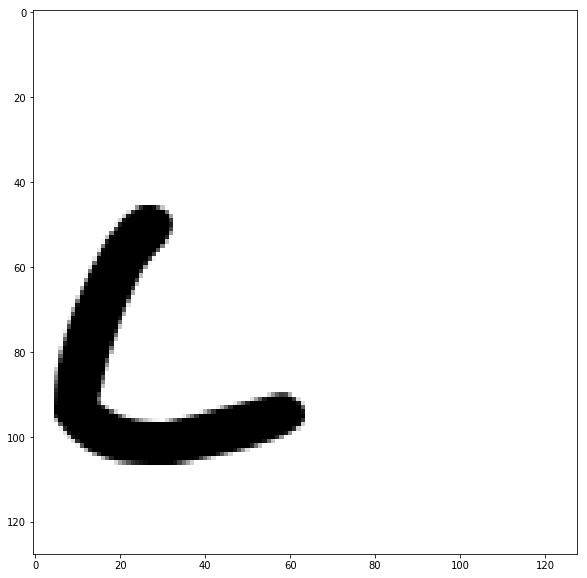

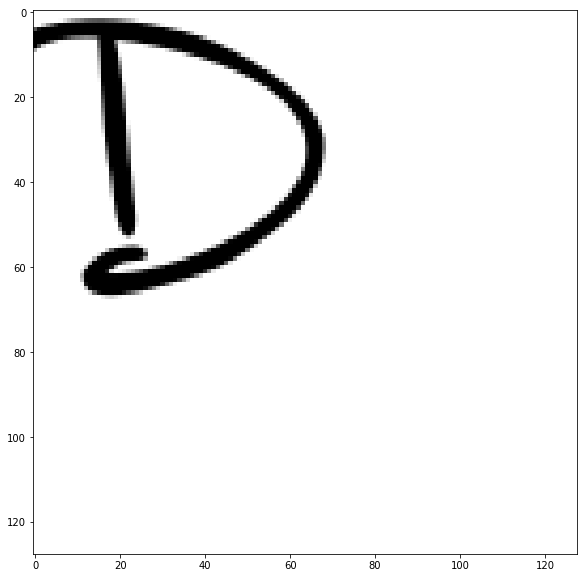

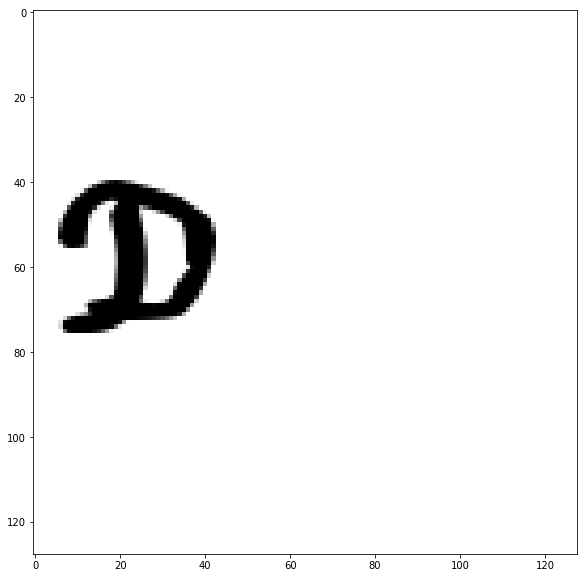

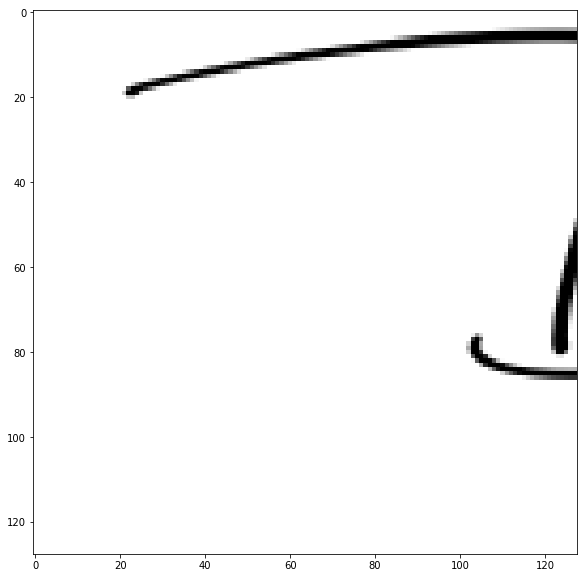

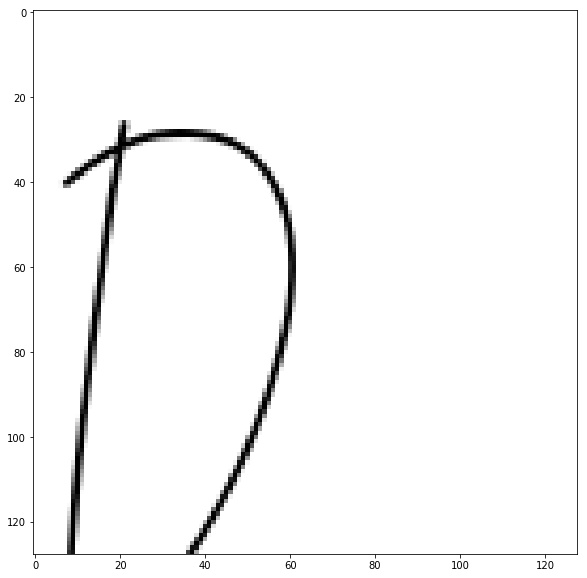

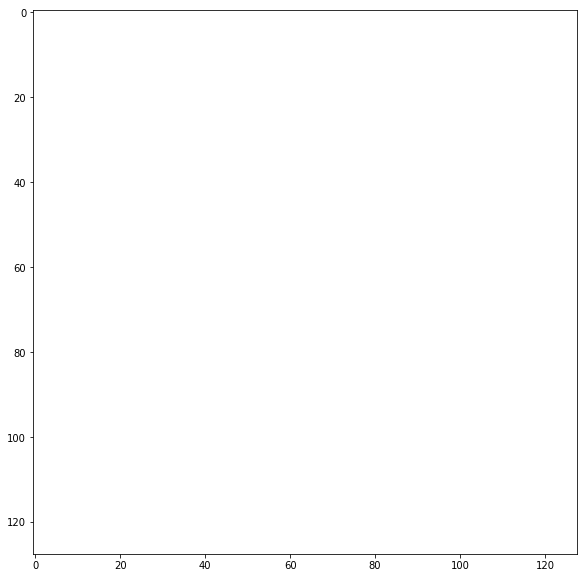

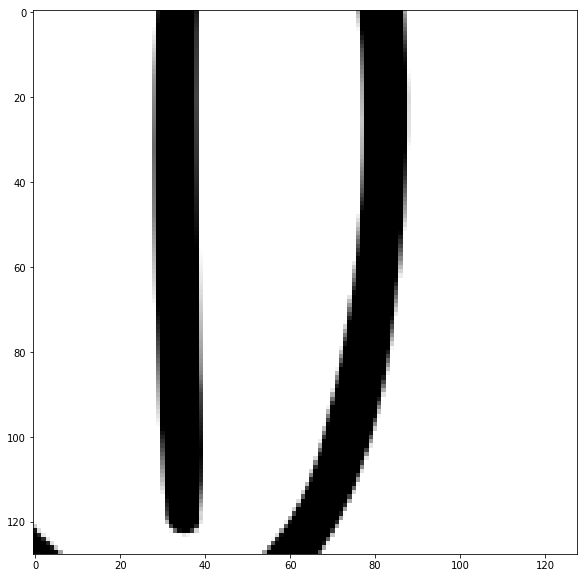

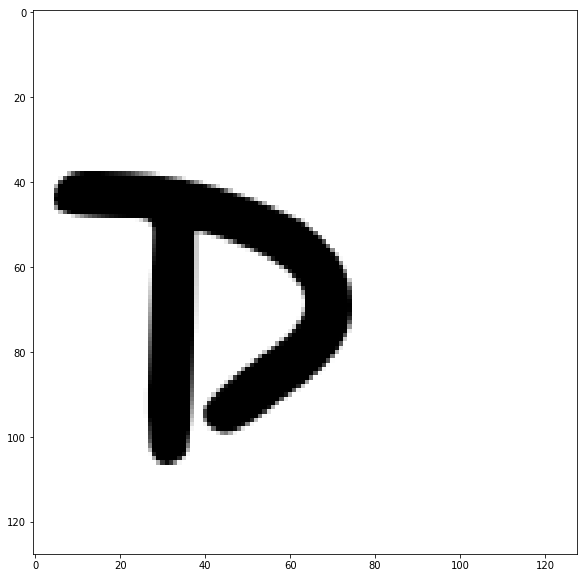

In [6]:
letters = ['B', 'C', 'D']
png_paths = []
for i in letters:
    for idx, font_name in enumerate(ttf_paths):
        fnt = ImageFont.truetype(ttf_paths[idx], 90)
        img = Image.new('RGB', (128,128), color = 'white')
        d = ImageDraw.Draw(img)
        d.text((5,0), i, font=fnt, fill=(0,0,0))
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        temp = font_name.split('/')[-1].split('.')[0]
        png_path = f'../data/preprocess_examples/{temp}_{i}.png'
        png_paths.append(png_path)
        img.save(png_path)


In [7]:
pxls = []
for i in png_paths:
    pxl = img_to_pxl(i)
    pxl = rgb2gray(pxl)
    pxls.append(pxl)

In [8]:
'''sample_set is a two layer nested tuple. Indexing the outer layer
determines the nth sample. the inner layer is a tuple of two elements,
providing info about the given sample: first element is png_path, 
second element is the pxl'''
sample_set = tuple(zip(png_paths[::3],pxls[::3]))

In [9]:
sample_one = sample_set[0]
sample_one_path= sample_one[0]
letter_one = sample_one_path.split('/')[-1].split('.')[0][-1]
corners_one = get_corners(sample_one[1])
x1_1 = corners_one['top']
x2_1 = corners_one['bottom']
y1_1 = corners_one['left']
y2_1 = corners_one['right']

dilate_factor = dilate_check(x1_1, x2_1,y1_1,y2_1)

downsize_factor = downsize_check(x1_1, x2_1,y1_1,y2_1)



new_png_path_one = preprocess_parameterization_part_one(sample_one_path, \
                                                        letter_one, \
                                                        downsize_factor=downsize_factor, \
                                                        dilate_factor=dilate_factor)
new_sample_one = img_to_pxl(new_png_path_one)
new_sample_one = rgb2gray(new_sample_one)


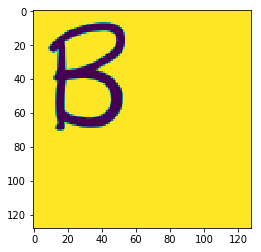

In [10]:
#sample one-before
plt.imshow(sample_one[1])

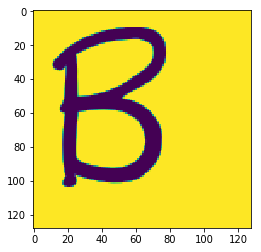

In [11]:
#sample one-after part one preprocessing
plt.imshow(new_sample_one)

In [12]:
new_corners_one = get_corners(new_sample_one)
new_x1_1 = new_corners_one['top']
new_x2_1 = new_corners_one['bottom']
new_y1_1 = new_corners_one['left']
new_y2_1 = new_corners_one['right']
centered_check = center_check(new_x1_1, new_x2_1, new_y1_1, new_y2_1)
new_new_sample_one = preprocess_parameterization_part_two(new_png_path_one,\
                                                          letter_one,
                                                downsize_factor=downsize_factor,\
                                                dilate_factor = dilate_factor,\
                                                x_shift = centered_check[1],\
                                                y_shift = centered_check[0])
new_new_sample_one = img_to_pxl(new_new_sample_one)


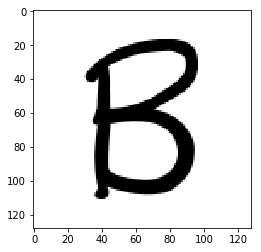

In [13]:
#sample one - after part two preprocessing
plt.imshow(new_new_sample_one)

In [14]:
sample_two = sample_set[1]
sample_two_path= sample_two[0]
letter_two = sample_two_path.split('/')[-1].split('.')[0][-1]

corners_two = get_corners(sample_two[1])
x1_2 = corners_two['top']
x2_2 = corners_two['bottom']
y1_2 = corners_two['left']
y2_2 = corners_two['right']

dilate_factor_two = dilate_check(x1_2, x2_2,y1_2,y2_2)

downsize_factor_two = downsize_check(x1_2, x2_2,y1_2,y2_2)



new_png_path_two = preprocess_parameterization_part_one(sample_two_path, \
                                                        letter_two,\
                                           downsize_factor=downsize_factor_two,\
                                              dilate_factor=dilate_factor_two)
new_sample_two = img_to_pxl(new_png_path_two)
new_sample_two = rgb2gray(new_sample_two)


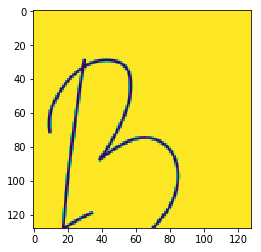

In [15]:
#sample two-before
plt.imshow(sample_two[1])

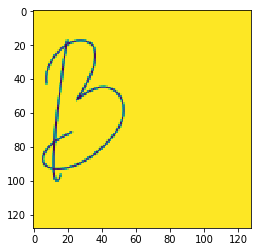

In [16]:
#sample two - after part one preprocessing
plt.imshow(new_sample_two)

In [17]:
new_corners_two = get_corners(new_sample_two)
new_x1_2 = new_corners_two['top']
new_x2_2 = new_corners_two['bottom']
new_y1_2 = new_corners_two['left']
new_y2_2 = new_corners_two['right']
centered_check_two = center_check(new_x1_2, new_x2_2, new_y1_2, new_y2_2)
new_new_sample_two = preprocess_parameterization_part_two(new_png_path_two,\
                                                          letter_two,\
                                                downsize_factor=downsize_factor_two,\
                                                dilate_factor = dilate_factor_two,\
                                                x_shift = centered_check_two[1],\
                                                y_shift = centered_check_two[0])
new_new_sample_two = img_to_pxl(new_new_sample_two)


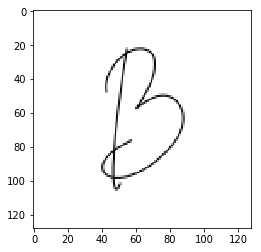

In [18]:
#sample two after part two preprocessing
plt.imshow(new_new_sample_two)

In [19]:
sample_three = sample_set[2]
sample_three_path= sample_three[0]
letter_three = sample_three_path.split('/')[-1].split('.')[0][-1]

corners_three = get_corners(sample_three[1])
x1_3 = corners_three['top']
x2_3 = corners_three['bottom']
y1_3 = corners_three['left']
y2_3 = corners_three['right']

dilate_factor_three = dilate_check(x1_3, x2_3,y1_3,y2_3)

downsize_factor_three = downsize_check(x1_3, x2_3,y1_3,y2_3)



new_png_path_three = preprocess_parameterization_part_one(sample_three_path, \
                                                          letter_three,\
                                           downsize_factor=downsize_factor_three,\
                                              dilate_factor=dilate_factor_three)
new_sample_three = img_to_pxl(new_png_path_three)
new_sample_three = rgb2gray(new_sample_three)


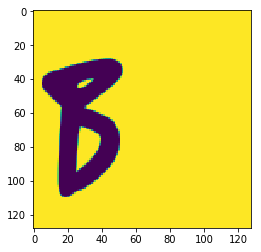

In [20]:
# sample three before
plt.imshow(sample_three[1])

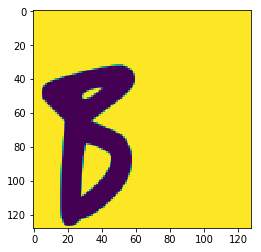

In [21]:
#sample three after part one preprocessing
plt.imshow(new_sample_three)

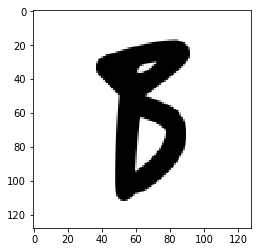

In [22]:
new_corners_three = get_corners(new_sample_three)
new_x1_3 = new_corners_three['top']
new_x2_3= new_corners_three['bottom']
new_y1_3 = new_corners_three['left']
new_y2_3 = new_corners_three['right']
centered_check_three = center_check(new_x1_3, new_x2_3, new_y1_3, new_y2_3)
new_new_sample_three = preprocess_parameterization_part_two(new_png_path_three,\
                                                            letter_three,\
                                                downsize_factor=downsize_factor_three,\
                                                dilate_factor = dilate_factor_three,\
                                                x_shift = centered_check_three[1],\
                                                y_shift = centered_check_three[0])
new_new_sample_three = img_to_pxl(new_new_sample_three)
plt.imshow(new_new_sample_three)

In [30]:
sample_four = sample_set[3]
sample_four_path= sample_four[0]
letter_four = sample_four_path.split('/')[-1].split('.')[0][-1]

corners_four = get_corners(sample_four[1])
x1_4 = corners_four['top']
x2_4 = corners_four['bottom']
y1_4 = corners_four['left']
y2_4 = corners_four['right']

dilate_factor_four = dilate_check(x1_4, x2_4,y1_4,y2_4)

downsize_factor_four = downsize_check(x1_4, x2_4,y1_4,y2_4)



new_png_path_four = preprocess_parameterization_part_one(sample_four_path, \
                                                         letter_four,\
                                           downsize_factor=downsize_factor_four,\
                                              dilate_factor=dilate_factor_four)
new_sample_four = img_to_pxl(new_png_path_four)
new_sample_four = rgb2gray(new_sample_four)


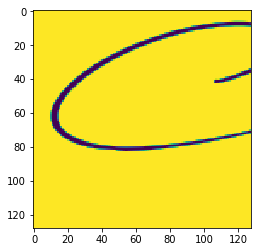

In [31]:
#sample four before
plt.imshow(sample_four[1])

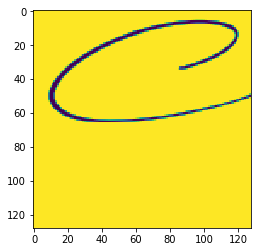

In [32]:
#sample four after part one PP
plt.imshow(new_sample_four)

In [33]:
new_corners_four= get_corners(new_sample_four)
new_x1_4 = new_corners_four['top']
new_x2_4= new_corners_four['bottom']
new_y1_4 = new_corners_four['left']
new_y2_4 = new_corners_four['right']
centered_check_four = center_check(new_x1_4, new_x2_4, new_y1_4, new_y2_4)
new_new_sample_four = preprocess_parameterization_part_two(new_png_path_four,\
                                                           letter_four,\
                                                downsize_factor=downsize_factor_four,\
                                                dilate_factor = dilate_factor_four,\
                                                x_shift = centered_check_four[1],\
                                                y_shift = centered_check_four[0])
new_new_sample_four = img_to_pxl(new_new_sample_four)


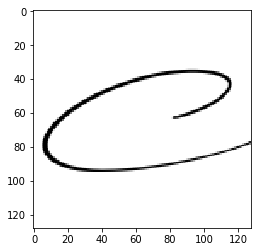

In [34]:
#sample four after part 2 pp
plt.imshow(new_new_sample_four)

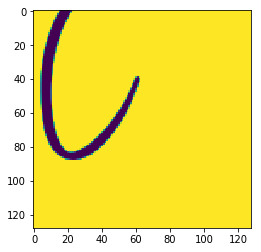

In [35]:
sample_five = sample_set[4]
sample_five_path= sample_five[0]
letter_five = sample_five_path.split('/')[-1].split('.')[0][-1]

corners_five = get_corners(sample_five[1])
x1_5 = corners_five['top']
x2_5 = corners_five['bottom']
y1_5 = corners_five['left']
y2_5 = corners_five['right']

dilate_factor_five = dilate_check(x1_5, x2_5,y1_5,y2_5)

downsize_factor_five = downsize_check(x1_5, x2_5,y1_5,y2_5)



new_png_path_five = preprocess_parameterization_part_one(sample_five_path, \
                                                         letter_five,\
                                           downsize_factor=downsize_factor_five,\
                                              dilate_factor=dilate_factor_five)
new_sample_five = img_to_pxl(new_png_path_five)
new_sample_five = rgb2gray(new_sample_five)


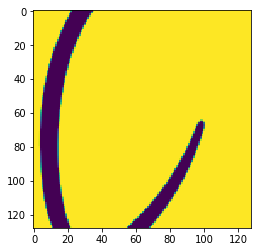

In [39]:
#sample set five before
plt.imshow(sample_five[1])

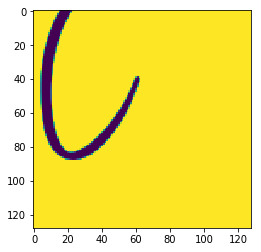

In [40]:
#sample five after part one PP
plt.imshow(new_sample_five)

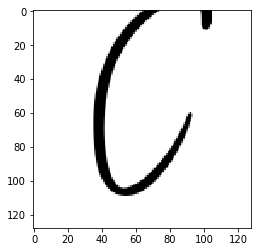

In [41]:
new_corners_five= get_corners(new_sample_five)
new_x1_5 = new_corners_five['top']
new_x2_5= new_corners_five['bottom']
new_y1_5 = new_corners_five['left']
new_y2_5 = new_corners_five['right']
centered_check_five = center_check(new_x1_5, new_x2_5, new_y1_5, new_y2_5)
new_new_sample_five = preprocess_parameterization_part_two(new_png_path_five,\
                                                           letter_five,\
                                                downsize_factor=downsize_factor_five,\
                                                dilate_factor = dilate_factor_five,\
                                                x_shift = centered_check_five[1],\
                                                y_shift = centered_check_five[0])
new_new_sample_five = img_to_pxl(new_new_sample_five)


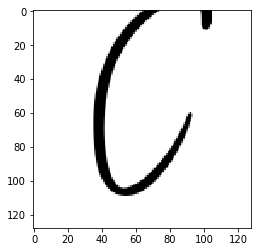

In [42]:
#sample five after part 2 PP
plt.imshow(new_new_sample_five)